For the blogpost, I chose the Titanic Dataset available at Kaggle (https://www.kaggle.com/c/titanic/data?select=train.csv)

The Titanic shipwreck was a major disaster. In this blogpost, we will analyze the dataset and see how and what type of people survived the crash. And vice-versa.



In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [46]:
df = pd.read_csv('train.csv')

We can see that the dataset has very interesting columns. An interesting fact to observe would be to see if more females survived the crash as a percentage or men.

In [47]:
df.shape

(891, 12)

In [48]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

We can see that there were 577 males and 314 females onboard the Titanic

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [50]:
df.shape

(891, 12)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [53]:
df.sort_values("Fare", ascending=False)[['Name', 'Fare']].head(10)

,Name,Fare
258,"Ward, Miss. Anna",512.3292
737,"Lesurer, Mr. Gustave J",512.3292
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292
88,"Fortune, Miss. Mabel Helen",263.0000
27,"Fortune, Mr. Charles Alexander",263.0000
341,"Fortune, Miss. Alice Elizabeth",263.0000
438,"Fortune, Mr. Mark",263.0000
311,"Ryerson, Miss. Emily Borie",262.3750
742,"Ryerson, Miss. Susan Parker ""Suzette""",262.3750
118,"Baxter, Mr. Quigg Edmond",247.5208


### Female

In [54]:
df[df['Sex'] == 'female'].Sex.count()

314

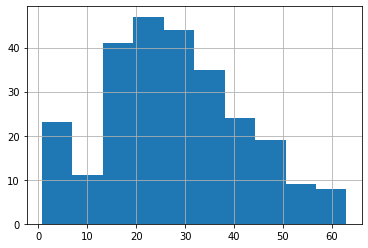

In [55]:
df[df['Sex'] == 'female'].Age.hist();

In [65]:
df[df['Sex'] == 'female'].Age.describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

In [70]:
df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]

233

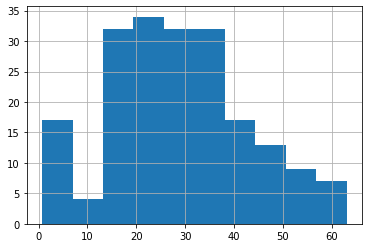

In [71]:
df[(df['Sex'] == 'female') & (df['Survived'] == 1)].Age.hist();

### Male

In [58]:
df[df['Sex'] == 'male'].Sex.count()

577

In [67]:
df[df['Sex'] == 'male'].Age.describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

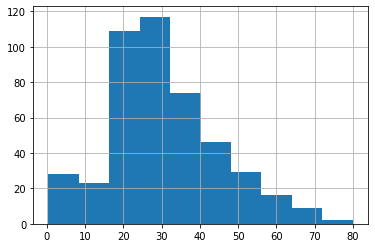

In [68]:
df[(df['Sex'] == 'male')].Age.hist();

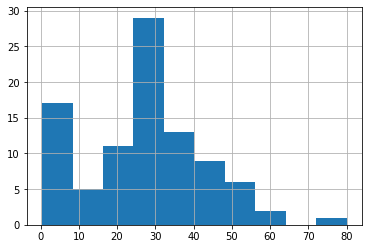

In [82]:
df[(df['Sex'] == 'male') & (df['Survived'] == 1)].Age.hist();

In [81]:
df[(df['Sex'] == 'male') & (df['Survived'] == 1)].Age.shape[0]

109

In [77]:
df[(df['Sex'] == 'male') & (df['Survived'] == 1)].Age.value_counts

109

### Survival of Different classes

In [60]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [61]:
df[(df.Pclass == 1) & (df['Survived'] == 1)].shape

(136, 12)

In [62]:
df[(df.Pclass == 2) & (df['Survived'] == 1)].shape

(87, 12)

In [63]:
df[(df.Pclass == 3) & (df['Survived'] == 1)].shape

(119, 12)

So, 136 out of 216 class-1 passengers survived (63%)

87 out of 184 class-2 passengers survived  (47%)

and 119 out of 491 class-3 passengers survived (24%)

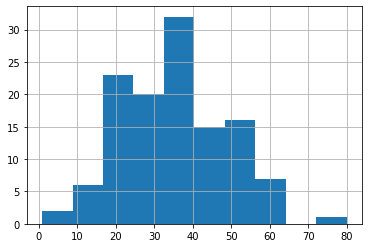

In [84]:
df[(df.Pclass == 1) & (df['Survived'] == 1)].Age.hist();

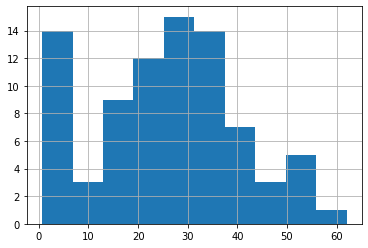

In [85]:
df[(df.Pclass == 2) & (df['Survived'] == 1)].Age.hist();

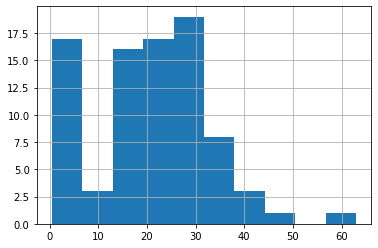

In [86]:
df[(df.Pclass == 3) & (df['Survived'] == 1)].Age.hist();

In [90]:
df[(df.Pclass == 3) & (df['Survived'] == 1)].Sex.value_counts()

female    72
male      47
Name: Sex, dtype: int64

In [91]:
df[(df.Pclass == 3)].Sex.value_counts()

male      347
female    144
Name: Sex, dtype: int64